<a href="https://colab.research.google.com/github/Mariobahaa/Solar-Flares/blob/master/Solar_Flares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!conda install beautifulsoup4
!conda install requests
!conda install pandas
!conda install numpy
!conda install matplotlib


# Step 1: Getting Data

The goal of this step is to extract the "Top 50 Solar Flares" data from www.spaceweatherlive.com,
To do so, After importing the required libraries, we make a new request to get the data,
then we convert it into pure text and then create a new BeautifulSoup object to use this data.

In [ ]:
import requests
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
response = requests.get(url)
html_raw = response.text
soup = BeautifulSoup(html_raw)
print(soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="Top 50 sol

We use our BeautifulSoup object to find all "tr" (table rows) tags in the body of the table with the specified class name,
Then we loop through all table row objects, and add the text of each item in the table row to the list referring to the column associated with this item.

In [ ]:
trs = soup.find(class_="table table-striped table-responsive-md").find("tbody").findAll("tr")
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
c6 = []
c7 = []
c8 = []
for tr in trs:
    tds = tr.findAll("td")
    c1.append(tds[0].text.strip())
    c2.append(tds[1].text.strip())
    c3.append(tds[2].text.strip())
    c4.append(tds[3].text.strip())
    c5.append(tds[4].text.strip())
    c6.append(tds[5].text.strip())
    c7.append(tds[6].text.strip())
    c8.append(tds[7].text.strip())
#     tb = []
#     for i in tds:
#         tb.append(i.text.strip())
#     table.append(tb)

In the end of this step we create a pandas dataframe having the desired names and assign each column to the previously made lists.

In [ ]:
table = {'Rank':c1, 'X_class':c2,'date':c3,'region':c4,'start_time':c5, 'max_time':c6, 'end_time': c7, 'movie':c8}
table = pd.DataFrame(table)

In [ ]:
table

,Rank,X_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


# Step 2: Data Cleaning

The goal of this step is to make the extracted data helpful enough to be used in upcoming processes.
First, we drop the last column.

In [ ]:
table = table.drop('movie', axis =1)

Then we concatenate the date column with the associated time columns and convert them into datetime objects, 
After that we assign the result to time columns.

In [ ]:
import datetime

table['start_time'] = pd.to_datetime(table['date'] + ' ' + table['start_time'])
table['end_time'] = pd.to_datetime(table['date'] + ' ' + table['end_time'])
table['max_time'] = pd.to_datetime(table['date'] + ' ' + table['max_time'])

Then we drop the date column as it is not needed anymore.

In [ ]:
table = table.drop(['date'], axis =1)

After that we replace each value encoded as '-' in the region column with 'NaN'.

In [ ]:
table['region'] = table['region'].replace('-', 'NaN')

In [ ]:
table

,Rank,X_class,region,start_time,max_time,end_time
0,1,X28+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,0930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,0486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


# Step 3: Scrape Data From NASA 

In this step, we're trying to scrape the data from NASA.
First thing first, we request the data, convert it into raw text and create a new BeautifulSoup object.

In [ ]:
url = "http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html"
response = requests.get(url)
html_raw = response.text
soup = BeautifulSoup(html_raw)
print(soup.prettify())

<html>
 <body>
  <h2>
   Wind/WAVES type II bursts and CMEs
  </h2>
  <a href="waves_type2_description.htm">
   A Brief Description
  </a>
  <pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  <a href="http://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="http://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a h

We use the raw text of the html, and loop through it to find the index of the character at which the text we're interested in starts.

In [ ]:
#nasaTxt = []

nasa = soup.text

In [ ]:
txt = []
ind = 0
for i in range(2,len(nasa)):
    if ( nasa[i] == '1' and nasa[i-1] == '\n' and nasa[i-2]=='='):
        ind = i
print(ind)

857


After that we remove all characters before the start, 
Then we split data into lines,
and each line is then splitted into words.

In [ ]:
nasa= nasa[ind:]

In [ ]:
nasa = nasa.split('\n')

In [ ]:
for ns in range(0,len(nasa)):
    nasa[ns] = nasa[ns].split()

In [ ]:
print(nasa)

[['1997/04/01', '14:00', '04/01', '14:15', '8000', '4000', 'S25E16', '8026', 'M1.3', '04/01', '15:18', '74', '79', '312', 'PHTX'], ['1997/04/07', '14:30', '04/07', '17:30', '11000', '1000', 'S28E19', '8027', 'C6.8', '04/07', '14:27', 'Halo', '360', '878', 'PHTX'], ['1997/05/12', '05:15', '05/14', '16:00', '12000', '80', 'N21W08', '8038', 'C1.3', '05/12', '05:30', 'Halo', '360', '464', 'PHTX'], ['1997/05/21', '20:20', '05/21', '22:00', '5000', '500', 'N05W12', '8040', 'M1.3', '05/21', '21:00', '263', '165', '296', 'PHTX'], ['1997/09/23', '21:53', '09/23', '22:16', '6000', '2000', 'S29E25', '8088', 'C1.4', '09/23', '22:02', '133', '155', '712', 'PHTX'], ['1997/11/03', '05:15', '11/03', '12:00', '14000', '250', 'S20W13', '8100', 'C8.6', '11/03', '05:28', '240', '109', '227', 'PHTX'], ['1997/11/03', '10:30', '11/03', '11:30', '14000', '5000', 'S16W21', '8100', 'M4.2', '11/03', '11:11', '233', '122', '352', 'PHTX'], ['1997/11/04', '06:00', '11/05', '04:30', '14000', '100', 'S14W33', '8100',

We create 15 empty lists for each column, loop through each line and assign each value to its corresponding column.

In [ ]:
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
c6 = []
c7 = []
c8 = []
c9 = []
c10 = []
c11 = []
c12 = []
c13 = []
c14 = []
c15 = []


NS = []
for i in nasa:
#     ns= []
#     for x in i:
#         ns.append[x]
#     NS.append(ns)
    #print(type(i))
    if(len(i) >=15):
        for x in range(0,len(i)):
            if x == 0:
                c1.append(i[x])
            if x == 1:
                c2.append(i[x])
            if x == 2:
                c3.append(i[x])
            if x == 3:
                c4.append(i[x])
            if x == 4:
                c5.append(i[x])
            if x == 5:
                c6.append(i[x])
            if x == 6:
                c7.append(i[x])
            if x == 7:
                c8.append(i[x])
            if x == 8:
                c9.append(i[x])
            if x == 9:
                c10.append(i[x])
            if x == 10:
                c11.append(i[x])
            if x == 11:
                c12.append(i[x])
            if x == 12:
                c13.append(i[x])
            if x == 13:
                c14.append(i[x])
            if x == 14:
                c15.append(i[x])
    


In [ ]:
print(len(c2))

482


At last, we create a new pandas dataframe and fill its named columns with lists we've previously made.

In [ ]:
NASA = {'Start_date':c1, 'Start_time':c2,'End_date':c3,'End_time':c4,'Start_freq':c5, 'End_freq':c6, 'flare_location': c7, 'flare_region':c8, 'importance':c9, 'CME_date':c10, 'CME_time':c11, 'CPA':c12, 'Width':c13, 'Speed':c14, 'Plot':c15}
NASA = pd.DataFrame(NASA)

In [ ]:
NASA

,Start_date,Start_time,End_date,End_time,Start_freq,End_freq,flare_location,flare_region,importance,CME_date,CME_time,CPA,Width,Speed,Plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


# Step 4: Cleaning NASA Data

In this step, we'll try to make the NASA Data more useable.

First we replace all blank data values with NaN.

In [ ]:
NASA = NASA.replace("-----", "NaN")

In [ ]:
NASA = NASA.replace("----", "NaN")

In [ ]:
NASA = NASA.replace("---", "NaN")

In [ ]:
NASA = NASA.replace("--:--", "NaN")
NASA = NASA.replace("--/--", "NaN")
NASA = NASA.replace("--", "NaN")


We iterate through a copy of CPA column, if its values is "Halo" we add true to the new column list, if not we add False.
we then create a new column called "is_halo" in the dataframe and give it the values of the list

In [ ]:
CPA = NASA['CPA']
C = [];
for i in range(0,len(CPA)):
    if CPA[i] == "Halo":
        C.append(True)
    else: 
        C.append(False)


In [ ]:
NASA["is_halo"] = C

Then, we replace all values equal to "Halo" in CPA column with "NaN"

In [ ]:
NASA["CPA"] = NASA["CPA"].replace("Halo","NaN")

We iterate through Width column, if it contains '>', we remove its first character and add True to the new column list and false if not.
And at last we assign the value of the list to the new dataframe column.

In [ ]:
W = NASA["Width"]
#print(W)
lb = []
for i in range(0,len(W)):
    if '>' in str(W[i]):
        x = str(W[i])
        x= x[1:]
        
        W[i] = x
        lb.append(True)
    else :
        lb.append(False)
        
#print(len(lb))
NASA["Width_lowerBound"] = lb
#NASA

D:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


At last we create three empty lists in which we add each date column to its corresponding time column with regard to NaN values.
We give the date columns the values of the lists and rename them to "datetime" and then delete all time columns from the dataframe.
To finally get our desired table.


In [ ]:
sdt = []
edt = []
cdt = []
for i in range(0,len(NASA["Start_date"])):
    if NASA["Start_date"][i] != "NaN" and NASA["Start_time"][i] != "NaN":
        sdt.append(str(NASA["Start_date"][i] + ' ' + NASA["Start_time"][i]))
    else: 
        if NASA["Start_date"][i] == "NaN":
            sdt.append(str(NASA["Start_time"][i]))
        elif  NASA["Start_time"][i] == "NaN":
            sdt.append(str(NASA["Start_date"][i]))
        else:
            sdt.append("NaN")
    
    if NASA["End_date"][i] != "NaN" and NASA["End_time"][i] != "NaN":
        edt.append(str(NASA["End_date"][i] + ' ' + NASA["End_time"][i]))
    else: 
        if NASA["End_date"][i] == "NaN":
            edt.append(str(NASA["End_time"][i]))
        elif  NASA["End_time"][i] == "NaN":
            edt.append(str(NASA["End_date"][i]))
        else:
            edt.append("NaN")
    
    
    
    if NASA["CME_date"][i] != "NaN" and NASA["CME_time"][i] != "NaN":
        cdt.append(str(NASA["CME_date"][i] + ' ' + NASA["CME_time"][i]))
    else: 
        if NASA["CME_date"][i] == "NaN":
            cdt.append(str(NASA["CME_time"][i]))
        elif  NASA["CME_time"][i] == "NaN":
            cdt.append(str(NASA["CME_date"][i]))
        else:
            cdt.append("NaN")
    
NASA["Start_date"] = sdt
NASA["End_date"] = edt
NASA["CME_date"] = cdt

NASA = NASA.rename(columns={"Start_date": "Start_datetime", "End_date": "End_datetime" , "CME_date": "CME_datetime"})

#NASA.drop("Start_date",axis =1)
NASA = NASA.drop("Start_time",axis =1)

#NASA.drop("End_date",axis =1)
NASA = NASA.drop("End_time",axis =1)

#NASA.drop("CME_date",axis =1)
NASA = NASA.drop("CME_time",axis =1)

NASA['Start_datetime'] = pd.to_datetime(NASA['Start_datetime'])

NASA

,Start_datetime,End_datetime,Start_freq,End_freq,flare_location,flare_region,importance,CME_datetime,CPA,Width,Speed,Plot,is_halo,Width_lowerBound
0,1997-04-01 14:00:00,04/01 14:15,8000,4000,S25E16,8026,M1.3,04/01 15:18,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,04/07 17:30,11000,1000,S28E19,8027,C6.8,04/07 14:27,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,05/14 16:00,12000,80,N21W08,8038,C1.3,05/12 05:30,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,05/21 22:00,5000,500,N05W12,8040,M1.3,05/21 21:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,09/23 22:16,6000,2000,S29E25,8088,C1.4,09/23 22:02,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,11/03 12:00,14000,250,S20W13,8100,C8.6,11/03 05:28,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,11/03 11:30,14000,5000,S16W21,8100,M4.2,11/03 11:11,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,11/05 04:30,14000,100,S14W33,8100,X2.1,11/04 06:10,NaN,360,785,PHTX,True,False
8,1997-11-06 12:20:00,11/07 08:30,14000,100,S18W63,8100,X9.4,11/06 12:10,NaN,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,11/27 14:00,14000,7000,N17E63,8113,X2.6,11/27 13:56,98,91,441,PHTX,False,False


# Part 2: Analysis

### Question 1: Replication

In the first stage of this part we sort the NASA dataframe by importance in descending order.

To do so, we make a new column which is equal to the ASCII of the first character in the importance column item multiplied by 100 and added to the float value of the rest of importance column item.

In [ ]:
tmp = []
for i in NASA['importance']:
    if i == "NaN":
        tmp.append(float(0))
    else:
        try:
            tmp.append(float((ord(i[0])*100)+float(i[1:])))
        except:
            tmp.append(float(0))
            
NASA['tmp'] = tmp


NASA = NASA.sort_values(by=['tmp'], inplace=False, ascending=False)
NASA = NASA.drop('tmp', axis= 1)
N = NASA[:50]
N

,Start_datetime,End_datetime,Start_freq,End_freq,flare_location,flare_region,importance,CME_datetime,CPA,Width,Speed,Plot,is_halo,Width_lowerBound
242,2003-11-04 20:00:00,11/04 24:00,10000,200,S19W83,10486,X28.,11/04 19:54,NaN,360,2657,PHTX,True,False
119,2001-04-02 22:05:00,04/03 02:30,14000,250,N19W72,9393,X20.,04/02 22:06,261,244,2505,PHTX,False,False
234,2003-10-28 11:10:00,10/29 24:00,14000,40,S16E08,10486,X17.,10/28 11:30,NaN,360,2459,PHTX,True,False
128,2001-04-15 14:05:00,04/16 13:00,14000,40,S20W85,9415,X14.,04/15 14:06,245,167,1199,PHTX,False,False
235,2003-10-29 20:55:00,10/29 24:00,11000,500,S15W02,10486,X10.,10/29 20:54,NaN,360,2029,PHTX,True,False
8,1997-11-06 12:20:00,11/07 08:30,14000,100,S18W63,8100,X9.4,11/06 12:10,NaN,360,1556,PHTX,True,False
330,2006-12-05 10:50:00,12/05 20:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False
238,2003-11-02 17:30:00,11/03 01:00,12000,250,S14W56,10486,X8.3,11/02 17:30,NaN,360,2598,PHTX,True,False
290,2005-01-20 07:15:00,01/20 16:30,14000,25,N14W61,10720,X7.1,01/20 06:54,NaN,360,882,PHTX,True,False
360,2011-08-09 08:20:00,08/09 08:35,16000,4000,N17W69,11263,X6.9,08/09 08:12,NaN,360,1610,PHTX,True,False


### Question 2: Intergration

In this stage we will try to find the best column to match the rows of table 1 with table 2.

Our process will begin by doing a little bit more cleaning so that the we can do the matching later on. We start this process by renaming the index axis and then removing last character in X_class and importance columns in case it is '.' r '+'.

In [ ]:
indices = []
for index, row in N.iterrows():
    indices.append(index)

for i in range(0,50):
    N = N.rename({indices[i]: i}, axis='index')


In [ ]:
newX = []
for i, row in table.iterrows():
    #print(i)
    if str(row['X_class'])[-1] == '+':
        s = ''
        for l in row['X_class']:
            if l != '+':
                s+= l
        newX.append(s)
    else :
        newX.append(str(row['X_class']))

        
table["X_class"] = newX 
#print(newX) 
#table

In [ ]:
newI = []
for i, row in N.iterrows():
    #print(i)
    if str(row['importance'])[-1] == '.':
        s = ''
        for l in row['importance']:
            if l != '.':
                s+= l
        newI.append(s)
    else :
        newI.append(str(row['importance']))

        
N['importance'] = newI

Then we will iterate through one of the dataframe rows using one column item and check if the corresponding column item with the same value in the other table exists or not.

In [ ]:
NC = N.copy(deep=True)
tb = table.copy(deep=True)

def matches(colName, tb, NC):
    matches = 0
    cut = False
    for ind, row in tb.iterrows():
        corres = 'importance'
        if colName == 'X_class':
            corres = 'importance'
        elif colName == 'start_time':
            corres = 'Start_datetime'
        elif colName == 'region':
            corres = 'flare_region'
        elif colName == 'max_time':
            corres = 'CME_datetime'
            cut =True
        elif colName == 'end_time':
            corres = 'End_datetime'
            cut = True
        
        for i, r in NC.iterrows():
            if cut == False and row[colName] == r[corres]:
                #b = check(row,r)
                #if b == True:
                NC = NC.drop([i])
                matches+= 1
                break
            if cut == True:
                try:
                    col = str(row[colName])
                    cor = str(r[corres])
    
                    dt1 = col[5] + col[6] + col[8] + col[9]
                    dt2 = cor[0] + cor[1] + cor[3] + cor[4]

                    t1 = col[10] + col[11] + col[12] + col[13] + col[14]
                
                    if int(cor[6] + cor[7]) != 24:
                        t2 = cor[6] + cor[7] + cor[8] + cor[9] + cor[10]
                    else: 
                        t2 = '0' + '0' + cor[8] + cor[9] + cor[10]
                except:
                        continue
                        
                if dt1 == dt2 and t1 == t2:
                        NC = NC.drop([i])
                        matches+= 1
                        break
                 
    return matches

In [ ]:
print(matches('X_class' , tb, NC))
print(matches('start_time' , tb, NC))
print(matches('region' , tb, NC))
print(matches('max_time' , tb, NC))
print(matches('end_time' , tb, NC))

28
0
9
0
0


From the above observatios we can clearly see the X_class and importance columns make the best matches.

### Question 3: Analysis

First, Plotting Starting frequency over time for Top 50 in data scraped from NASA

Note: This cell needs to be runned two times before plotting.

Note: Fequency is ordered in descending order on Y-axis.

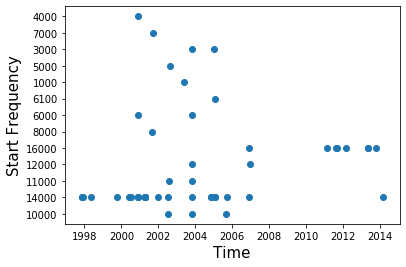

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

NSFreq = N["Start_freq"].tolist()
NTime  = N["Start_datetime"].tolist()

plt.ylabel('Start Frequency', fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.scatter(NTime ,NSFreq, label = "Start Frequency VS Time")
#plt.plot(NTime,NSFreq)
plt.show()



Second, Plotting Flare Width over time for NASA data

48
48


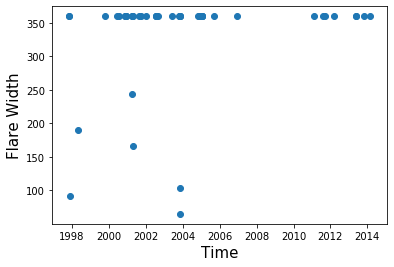

In [ ]:
NTime  = N["Start_datetime"].tolist()
NWidth = N["Width"].tolist()
popl = []
for i in range(0,len(NWidth)):
    if NWidth[i] == "NaN" or np.isnan(float(NWidth[i])):
        popl.append(i)

for i in popl:
    NTime.pop(i)
    
    
for i in popl:
    NWidth.pop(i)
    
plt.ylabel('Flare Width', fontsize = 15)
plt.xlabel('Time', fontsize = 15)

NWidth = [float(i) for i in NWidth]

print(len(NTime))
print(len(NWidth))


plt.scatter(NTime ,NWidth, label = "Flare Width VS Time")
plt.show()

Thank you !

Mario Bahaa Zarif

SC - Sec 4

2016170319